# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:53:21.768791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:53:24.744180
2025-04-14 18:53:24.744180


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:53:19"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

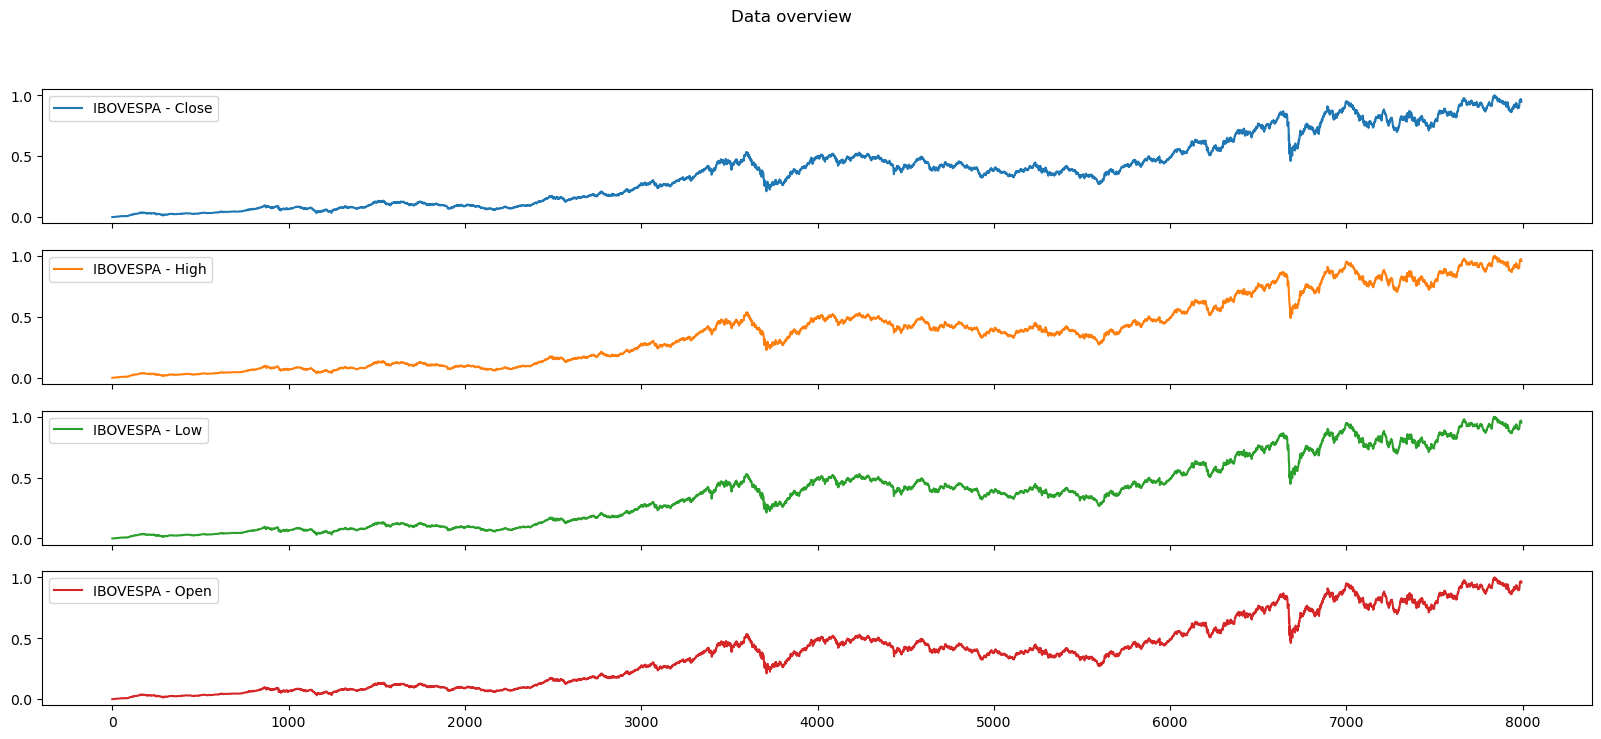

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

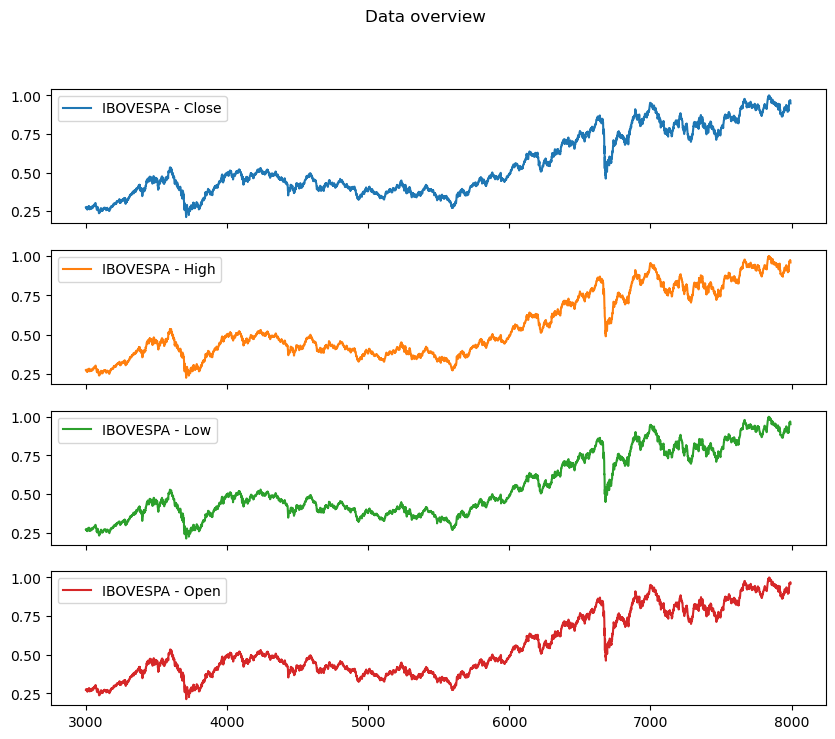

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

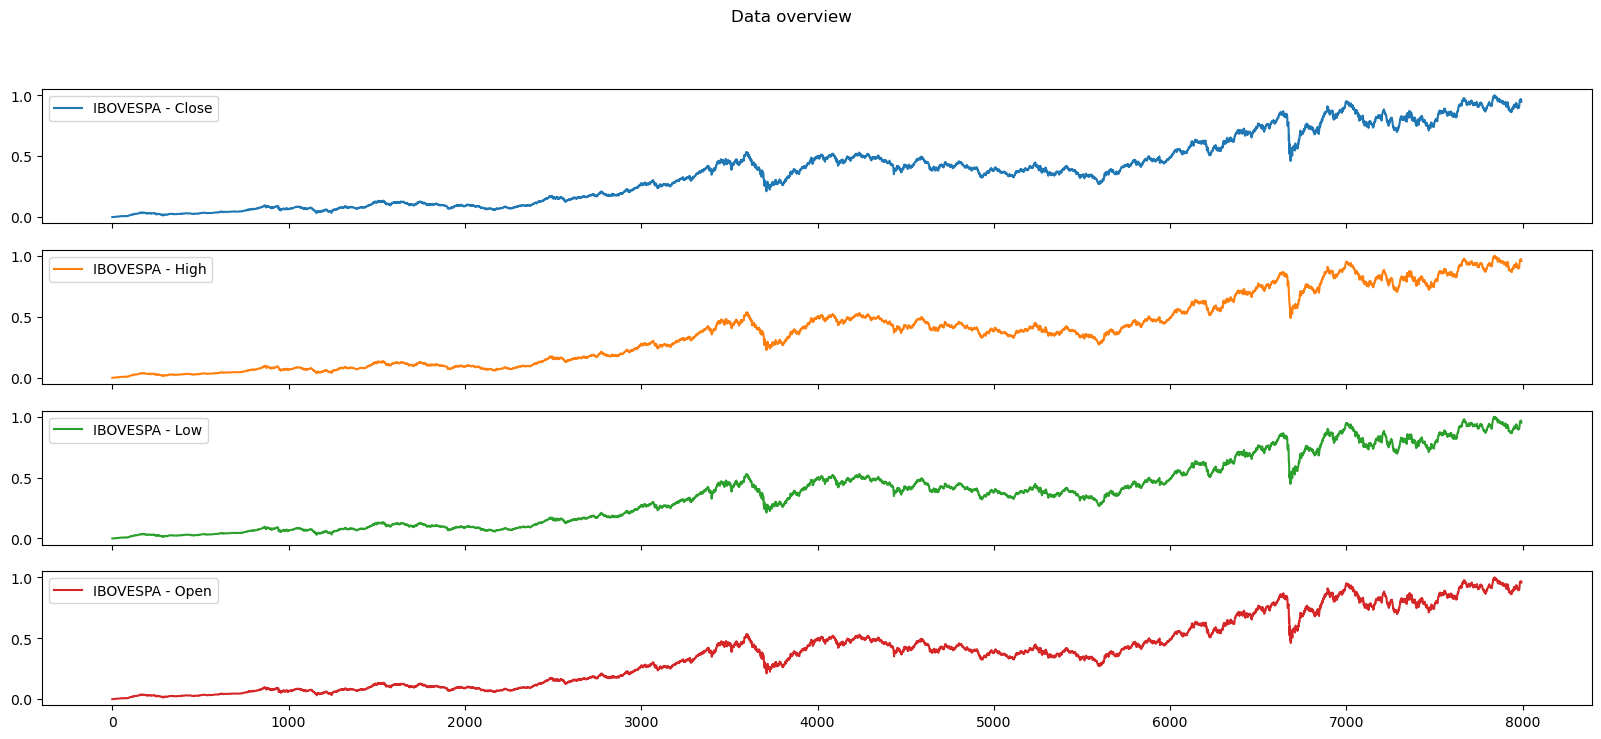

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

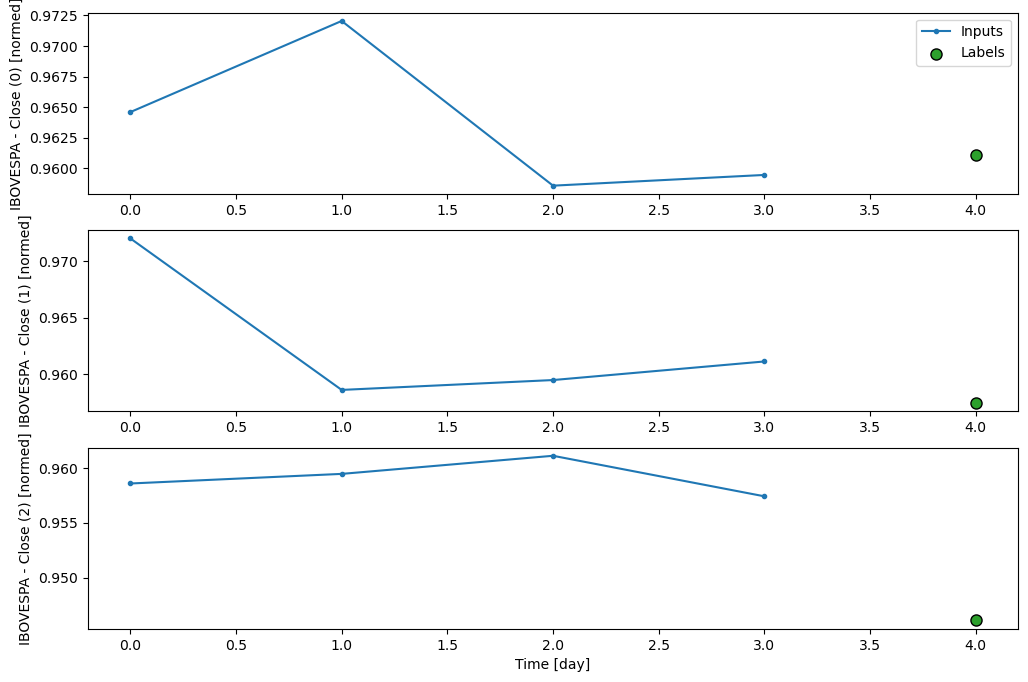

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

4

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14:20 4s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 52.4464 - mean_squared_error: 3.9936e-05 - root_mean_squared_error: 0.0060   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.2319 - mean_squared_error: 4.4159e-05 - root_mean_squared_error: 0.0065

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 34.7747 - mean_squared_error: 4.5996e-05 - root_mean_squared_error: 0.0066

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 31.4873 - mean_squared_error: 6.5725e-05 - root_mean_squared_error: 0.0078

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 29.9010 - mean_squared_error: 1.0604e-04 - root_mean_squared_error: 0.0095

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.9001 - mean_squared_error: 1.6422e-04 - root_mean_squared_error: 0.0114

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 28.0739 - mean_squared_error: 1.9840e-04 - root_mean_squared_error: 0.0126

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.3610 - mean_squared_error: 2.3207e-04 - root_mean_squared_error: 0.0138

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 26.9386 - mean_squared_error: 2.7655e-04 - root_mean_squared_error: 0.0150

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 26.5278 - mean_squared_error: 3.2233e-04 - root_mean_squared_error: 0.0162

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 26.1367 - mean_squared_error: 3.7522e-04 - root_mean_squared_error: 0.0174

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 25.7334 - mean_squared_error: 4.3162e-04 - root_mean_squared_error: 0.0186

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 25.3580 - mean_squared_error: 5.2396e-04 - root_mean_squared_error: 0.0203

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 25.2155 - mean_squared_error: 6.1411e-04 - root_mean_squared_error: 0.0216

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 25.0410 - mean_squared_error: 7.6097e-04 - root_mean_squared_error: 0.0235

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 24.8987 - mean_squared_error: 8.8444e-04 - root_mean_squared_error: 0.0251

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 24.6948 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0269    

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 24.4503 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 24.2012 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 23.9518 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 23.7142 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 23.4986 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0343

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 23.2548 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 23.0436 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 22.8527 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0385

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 22.6880 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 22.5459 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0409 - val_loss: 0.2098 - val_mean_absolute_error: 0.2098 - val_mean_absolute_percentage_error: 22.5575 - val_mean_squared_error: 0.0455 - val_root_mean_squared_error: 0.2134


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7016 - mean_absolute_error: 0.7016 - mean_absolute_percentage_error: 32926.2422 - mean_squared_error: 0.4923 - root_mean_squared_error: 0.7016

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6655 - mean_absolute_error: 0.6655 - mean_absolute_percentage_error: 13490.3828 - mean_squared_error: 0.4448 - root_mean_squared_error: 0.6664 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6117 - mean_absolute_error: 0.6117 - mean_absolute_percentage_error: 9472.2588 - mean_squared_error: 0.3902 - root_mean_squared_error: 0.6224 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5484 - mean_absolute_error: 0.5484 - mean_absolute_percentage_error: 7483.5596 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5776

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4942 - mean_absolute_error: 0.4942 - mean_absolute_percentage_error: 6250.6255 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5380

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 5322.7441 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.5014

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 4715.5771 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4740

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 4199.1958 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4483

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 3831.4509 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4285

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 3529.0247 - mean_squared_error: 0.1867 - root_mean_squared_error: 0.4111

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 3275.4109 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3959

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 3059.2751 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3822

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 2872.6099 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3700

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 2709.6624 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3590

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 2551.1667 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3481

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 2425.0972 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3392

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 2312.1196 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3310

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 2199.4961 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3225

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 2108.0125 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3155

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 2024.5647 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3090

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1948.1119 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3028

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 1877.7988 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2971

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 1812.8967 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2919

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 1752.7833 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2870

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 1690.9548 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2820

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1639.2791 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2777


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1596.1897 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2741 - val_loss: 0.1339 - val_mean_absolute_error: 0.1339 - val_mean_absolute_percentage_error: 14.3339 - val_mean_squared_error: 0.0194 - val_root_mean_squared_error: 0.1393


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.6271 - mean_absolute_error: 0.6271 - mean_absolute_percentage_error: 29424.0703 - mean_squared_error: 0.3933 - root_mean_squared_error: 0.6271

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6002 - mean_absolute_error: 0.6002 - mean_absolute_percentage_error: 12087.7246 - mean_squared_error: 0.3614 - root_mean_squared_error: 0.6008 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5419 - mean_absolute_error: 0.5419 - mean_absolute_percentage_error: 8462.3457 - mean_squared_error: 0.3097 - root_mean_squared_error: 0.5535 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4631 - mean_absolute_error: 0.4631 - mean_absolute_percentage_error: 6492.8613 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.4989

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4072 - mean_absolute_error: 0.4072 - mean_absolute_percentage_error: 5421.8315 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4600

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3639 - mean_absolute_error: 0.3639 - mean_absolute_percentage_error: 4681.9282 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4288

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 4136.6147 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.4033

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 3675.1675 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3799

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 3347.9648 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3621

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 3079.6482 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3467

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 2855.1018 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3331

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 2664.0820 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3212

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 2499.3743 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3104

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 2355.7275 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3008

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 2229.2180 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2920

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 2116.8433 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2840

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 2016.2910 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2767

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 1916.2292 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2692

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 1835.0742 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2629

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 1761.1462 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2571

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 1693.4999 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2517

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 1631.3414 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2467

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1574.0022 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2420

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 1520.9325 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2375

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1471.6655 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2334

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 1420.8811 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2292


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1348 - mean_absolute_error: 0.1348 - mean_absolute_percentage_error: 1378.3646 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2255 - val_loss: 0.1432 - val_mean_absolute_error: 0.1432 - val_mean_absolute_percentage_error: 15.3414 - val_mean_squared_error: 0.0219 - val_root_mean_squared_error: 0.1480


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5011 - mean_absolute_error: 0.5011 - mean_absolute_percentage_error: 23522.2109 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.5012

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4768 - mean_absolute_error: 0.4768 - mean_absolute_percentage_error: 9648.0889 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4774  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 6561.2783 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4363

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 5214.9019 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3999

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 4367.3442 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3700

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 3779.3945 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3457

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 3344.5864 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3257

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 3008.4238 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.3089

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 2713.3792 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2931

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 2498.1072 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2808

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 2299.4265 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2690

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 2148.3538 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2595

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 2017.7706 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2511

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 1915.6108 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2443

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1813.5399 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2372

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 1722.8097 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2308

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1641.5740 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2249

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1568.3749 - mean_squared_error: 0.0579 - root_mean_squared_error: 0.2195

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1502.0332 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2144

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 1435.2113 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2092

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 1380.4299 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2048

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 1330.0627 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2008

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 1283.5847 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1969

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 1240.5553 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1933

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1200.5995 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.1900

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1163.3813 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1869

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1128.6194 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1840


Epoch: 4 - LR: 0.009045630693435669


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1124.9037 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1837 - val_loss: 0.1142 - val_mean_absolute_error: 0.1142 - val_mean_absolute_percentage_error: 12.2135 - val_mean_squared_error: 0.0143 - val_root_mean_squared_error: 0.1195


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 15439.7676 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3286

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 6309.0737 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.3081  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 4402.4482 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2808

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 3459.5747 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2555

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 2882.7327 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2362

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 2488.4346 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2208

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 2198.9873 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2081

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 1976.1768 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1975

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 1798.6339 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1885

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1653.4186 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1806

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1532.1770 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1737

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 1429.1848 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1675

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 1340.5071 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1621

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 1263.2610 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1572

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 1188.2909 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1523

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 1128.8048 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1485

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1075.5745 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1449

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1027.6162 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1416

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 984.1575 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1386 

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 944.5737 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1357

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 908.3553 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1330

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 871.5466 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1302

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 841.1240 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1279

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 812.9578 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1257

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 786.8130 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1237

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 762.4616 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1219

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 744.6403 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1205


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 734.8686 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1198 - val_loss: 0.0465 - val_mean_absolute_error: 0.0465 - val_mean_absolute_percentage_error: 4.9444 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0521


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 12925.6211 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2750

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 5271.4810 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2558  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 3665.5583 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2311

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 2875.6553 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2097

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 2352.1697 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1922

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 2036.1676 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1799

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1499 - mean_absolute_error: 0.1499 - mean_absolute_percentage_error: 1803.0493 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1699

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 1623.1514 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1615

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 1479.6176 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1544

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 1362.3202 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1483

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1254.2113 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1425

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1172.0507 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1378

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1101.0444 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1336

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1039.0144 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1298

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 984.3276 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1265 

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 930.6341 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1232

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 887.5847 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1204

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 848.7369 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1179

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 813.4847 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1156

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 777.9332 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1131

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 748.7573 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1111

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 721.9059 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1091

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 697.0992 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1073

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 671.6522 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1054

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 650.4432 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1037

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 628.5517 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1021


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 614.1756 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1010 - val_loss: 0.0489 - val_mean_absolute_error: 0.0489 - val_mean_absolute_percentage_error: 5.2067 - val_mean_squared_error: 0.0028 - val_root_mean_squared_error: 0.0532


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 12922.2305 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2749

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 5243.1133 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2515  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 3633.5522 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2254

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 2846.2576 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2040

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 2326.5596 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1870

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 2013.0173 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1750

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1781.8334 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1652

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1603.4889 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1570

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 1461.2308 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1500

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1345.0253 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1441

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1268.0260 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1400

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1182.3937 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1353

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1101.1577 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1306

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1037.9521 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1268

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 976.5823 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1231 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 927.8735 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1201

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 884.2780 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1174

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 844.9979 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1148

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 809.4117 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1125

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 780.4599 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1105

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 750.5225 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1085

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 723.0292 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1066

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 697.6742 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1048

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 676.7327 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1032

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 661.9196 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1022

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 641.0027 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1007

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 621.4982 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0993


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 605.2330 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0981 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297 - val_mean_absolute_percentage_error: 3.1690 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0346


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 15099.9473 - mean_squared_error: 0.1033 - root_mean_squared_error: 0.3214

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 6527.0259 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.3052  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 4326.9048 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2789

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 3409.6741 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2552

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 2845.0024 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2365

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 2457.0769 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2212

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 2171.6875 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.2086

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 1973.8431 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1990

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 1812.5677 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1908

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1678.2654 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1835

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 1551.4742 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1763

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1444.3256 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1699

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1352.4233 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1642

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 1264.3970 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1585

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1195.3650 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1539

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1134.2006 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1497

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 1079.5846 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1458

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 1030.4834 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1422

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 986.0759 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1389 

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 941.4354 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1355

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 904.9044 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1327

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 871.3694 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1300

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 847.1213 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1281

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 814.9506 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1254

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 788.2122 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1232

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 763.3402 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1211

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 737.6589 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1189


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 725.5236 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1179 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368 - val_mean_absolute_percentage_error: 3.9093 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0413


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 11549.3184 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2456

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 4676.2314 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2230  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1931 - mean_absolute_error: 0.1931 - mean_absolute_percentage_error: 3234.8740 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1990

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1684 - mean_absolute_error: 0.1684 - mean_absolute_percentage_error: 2530.8870 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1796

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 2103.6562 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1655

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 1813.7383 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1545

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 1601.6227 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1457

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1423.0266 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1376

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1296.7585 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1315

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 1183.4154 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1260

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1098.8672 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1216

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 1026.7872 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1177

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 964.4871 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1142 

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 904.4116 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1107

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 857.0170 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1077

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 814.8195 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1051

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 776.9866 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1026

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 742.8506 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1003

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 711.8779 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0982

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 683.6363 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0962

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 657.7664 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0943

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 631.4443 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0924

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 609.6651 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0907

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 589.4814 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0892

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 570.7221 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0877

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 553.2403 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0864


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 536.9064 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0852 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355 - val_mean_absolute_percentage_error: 3.7694 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0400


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 11142.2979 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2370

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 4505.0146 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.2141  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 3215.4089 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1927

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 2432.6191 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1717

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 2022.4147 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1584

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 1770.3286 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1491

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1580.3068 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1414

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 1414.7673 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1341

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 1284.0051 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1279

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1177.8706 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1226

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1089.7241 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1180

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 1015.1208 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1138

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 951.0565 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1101 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 889.6307 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1065

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 841.4494 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1035

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 798.7541 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1010

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 760.6179 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0986

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 726.3127 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0965

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 695.2690 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0945

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 667.0285 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0926

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 641.2131 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0908

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 617.5128 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 595.6697 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0876

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 575.4667 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0861

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 556.7240 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0847

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 539.2858 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0835

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 523.0130 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0823


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 514.4354 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0817 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334 - val_mean_absolute_percentage_error: 3.5493 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0377


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 10879.9131 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2314

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 4399.4927 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2091  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 3039.9028 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1861

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 2377.7808 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1680

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1976.5925 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1548

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1678.9603 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1436

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1485.7227 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1355

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1322.0480 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1281

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1205.7273 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1224

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 1100.6984 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1169

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1022.2137 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1126

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 955.2576 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1088 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 897.3788 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1054

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 846.8217 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1023

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 802.2527 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0997

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 762.6127 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0973

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 727.0959 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0951

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 698.4626 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0933

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 675.3802 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0918

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 648.0720 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0900

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 623.0988 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0883

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 600.1624 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0867

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 576.7661 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0850

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 557.3629 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0836

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 537.4276 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0822

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 520.7869 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0809

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 503.5822 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0797


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 501.9331 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0795 - val_loss: 0.0398 - val_mean_absolute_error: 0.0398 - val_mean_absolute_percentage_error: 4.2366 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0434


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 9422.3223 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.2003

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 3800.2715 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1792 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 2615.2566 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1579

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 2043.6061 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1424

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1698.1600 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1313

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1442.6777 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1221

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1276.9563 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1154

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 1149.2283 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1099

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 1047.2758 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1052

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 963.8524 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1011 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 894.0781 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0974

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 834.7031 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0942

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 783.4832 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0913

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 738.8069 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0887

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 699.4885 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0864

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 664.5710 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0844

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 633.3271 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0825

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 605.1769 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0808

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 579.6675 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0791

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 556.4328 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0776

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 535.1711 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 515.6306 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0748

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 497.6035 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0736

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 480.9146 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0724

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 463.7644 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0711

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 449.4460 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 434.6415 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0690


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 433.2225 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0689 - val_loss: 0.0442 - val_mean_absolute_error: 0.0442 - val_mean_absolute_percentage_error: 4.7208 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0473


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 10034.9277 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2133

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 4049.5256 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1914  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 2887.1509 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1718

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 2235.7715 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1545

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 1849.5734 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1426

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1565.9417 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1324

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1382.9720 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1250

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1228.6658 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1181

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1119.3550 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1129

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 1020.8942 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1078

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 947.4503 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1039 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 878.4796 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1000

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 825.2727 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0968

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 778.8082 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0941

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 737.8575 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0918

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 701.4250 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0896

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 668.7778 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0876

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 639.3276 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0858

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 612.6119 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0841

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 585.6812 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0823

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 563.5845 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0808

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 543.2529 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0794

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 522.4783 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 505.2233 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0766

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 489.1832 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0754

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 474.2314 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0743


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 461.7658 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734 - val_loss: 0.0333 - val_mean_absolute_error: 0.0333 - val_mean_absolute_percentage_error: 3.5367 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0373


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 8321.3037 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1768

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 3342.6802 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1559 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 2290.4060 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1359

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 1787.7087 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1224

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1457.8407 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1119

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 1259.9120 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1047

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 1114.2167 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0988

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1001.9005 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0938

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 912.3792 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0896 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 839.1833 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0859

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 778.0255 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0828

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 726.0244 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0799

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 681.1957 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0774

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 642.1212 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0751

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 607.7510 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0731

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 583.7202 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 555.7542 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0700

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 530.6053 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0685

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 507.8526 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 487.1584 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0657

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 468.2459 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0644

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 449.0456 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 433.1909 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 420.0987 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0611

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 406.3761 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 393.6104 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 381.7024 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 375.4266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312 - val_mean_absolute_percentage_error: 3.3132 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0352


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 9199.7959 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1955

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 3702.7251 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1737 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 2546.0999 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1528

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 1988.5808 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1376

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1651.9781 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1269

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1424.2833 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1188

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 1257.7692 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1122

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1129.9143 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1067

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 1028.1964 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1019

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 945.1883 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0979 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 875.9418 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0943

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 817.1287 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0911

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 766.4688 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0882

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 722.3359 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0856

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 683.5477 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0834

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 649.1332 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0814

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 618.3651 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0795

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 590.6658 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0778

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 565.5808 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 542.7443 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0747

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 521.8567 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0733

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 502.6703 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0720

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 484.9786 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0707

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 468.6081 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0696

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 453.4143 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 439.2730 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0674

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 426.0731 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0665


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 420.4861 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661 - val_loss: 0.0302 - val_mean_absolute_error: 0.0302 - val_mean_absolute_percentage_error: 3.2079 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0343


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 7623.2295 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1619

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 3056.7551 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1417 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 2091.0845 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1231

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 1595.8097 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1102

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 1332.6835 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1023

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 1153.0319 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0962

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 1020.9384 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0913

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 919.1940 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0872 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 838.1498 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0838

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 772.0825 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0810

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 716.8229 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0785

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 664.9471 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0761

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 624.9151 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0741

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 586.2896 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0720

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 555.8019 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0703

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 528.6423 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0688

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 504.2753 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0673

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 482.2767 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0660

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 460.1989 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0645

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 442.1578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0634

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 425.6165 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0622

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 410.3887 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 394.8213 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0600

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 381.8855 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0591

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 368.5700 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0581

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 357.4365 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 349.2811 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567 - val_loss: 0.0411 - val_mean_absolute_error: 0.0411 - val_mean_absolute_percentage_error: 4.3942 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0439


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 7535.8740 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1600

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 3012.6624 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1387 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 2056.1025 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1199

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1565.3105 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1065

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 1304.6450 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0980

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 1126.6599 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0915

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 996.1401 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0864 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 895.8751 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0822

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 815.9822 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0786

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 750.7869 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0757

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 696.2745 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0730

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 659.5987 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0712

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 618.3082 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0690

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 582.3840 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0670

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 550.8462 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0653

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 519.9790 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0636

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 495.3064 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 473.0990 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0609

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 452.9901 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 434.6851 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 417.9444 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 400.9372 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 386.8871 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0554

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 373.8831 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 361.8106 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 350.5719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 340.0795 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 336.7369 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_absolute_percentage_error: 2.9855 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0321


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 9005.7500 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1914

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 3627.0571 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1705 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 2497.2168 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1504

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1950.2234 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1353

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 1619.5219 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1246

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 1395.6464 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1163

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 1232.1094 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1098

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1106.7213 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1044

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1007.2048 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0998

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 926.2690 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0961 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 858.7847 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0928

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 795.5957 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0896

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 746.9454 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0870

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 700.0931 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0844

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 663.1729 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0822

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 630.3300 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0802

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 600.9008 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0784

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 574.3622 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0767

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 550.2932 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0751

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 528.3539 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0736

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 508.2652 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 489.7947 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 472.7488 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 456.9630 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0684

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 443.8782 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 430.1146 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0664

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 417.2624 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0655


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 413.1676 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288 - val_mean_absolute_percentage_error: 3.0630 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0326


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 7499.9932 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1593

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 3005.4392 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1392 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 2056.2502 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1209

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 1568.6317 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1081

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1309.5988 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1002

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1116.4054 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0935

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 990.3541 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0887 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 883.4117 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0844

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 807.3682 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0811

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 745.0586 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0784

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 692.7153 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0761

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 647.9799 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0740

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 609.2377 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0720

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 575.3293 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0702

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 545.3719 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0686

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 515.8994 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0669

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 492.2381 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0654

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 470.8647 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 451.4512 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0629

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 433.7315 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0617

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 417.4872 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 402.5343 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 388.7204 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0586

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 375.9152 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 364.0095 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 352.9107 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 342.5385 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552 - val_loss: 0.0365 - val_mean_absolute_error: 0.0365 - val_mean_absolute_percentage_error: 3.8874 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0402


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 7219.6758 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1533

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 2887.1565 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1330 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1971.3611 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1150

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 1500.8434 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1022

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 1250.9315 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0941

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 1080.2778 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0878

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 955.1182 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0829 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 858.9664 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0789

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 797.9963 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0762

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 732.7171 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0732

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 678.4091 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0706

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 632.3733 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0683

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 592.7858 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 558.3398 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 528.0699 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 498.4326 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0608

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 474.7371 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 453.4083 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 434.0969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0568

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 416.5202 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 400.4487 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 384.1246 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 370.6401 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 358.1608 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 346.5763 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 334.6401 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 323.5800 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 322.5200 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165 - val_mean_absolute_percentage_error: 1.7711 - val_mean_squared_error: 4.3325e-04 - val_root_mean_squared_error: 0.0208


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 8516.6572 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1809

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 3433.0913 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1616 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 2627.0500 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1488

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 2222.3074 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1392

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1848.3480 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1287

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 1564.2811 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1196

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 1344.2650 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1118

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 1184.4924 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1054

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1062.4249 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1002

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 956.2697 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0953 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 879.5173 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0917

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 809.0149 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0883

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 755.5255 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0855

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 704.6049 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 664.8793 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0804

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 629.8375 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0783

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 598.6609 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0764

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 567.7987 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0745

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 540.2656 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 517.8922 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0712

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 501.8578 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0701

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 482.7868 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0687

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 465.2509 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 449.0667 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 434.0781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 420.1550 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 407.1860 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0631

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 393.7758 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 392.4904 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277 - val_mean_absolute_percentage_error: 2.9384 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0317


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 6746.2998 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1432

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 2693.4009 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1235 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 1778.0095 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1050

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1398.8274 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0948

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 1166.4443 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0875

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 1007.6935 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0819

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 891.1418 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0774 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 801.5051 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0736

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 730.0288 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0704

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 671.5767 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0677

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 617.7979 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0650

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 576.9710 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0629

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 538.0960 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0607

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 520.7615 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 504.6303 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 483.8263 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 470.0952 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 449.8350 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 431.4197 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 416.6216 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 406.7207 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 397.3271 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 390.1509 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 386.6693 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 383.2558 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 376.6254 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 370.2439 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 364.0970 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 356.7234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 349.6728 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 344.2504 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0486

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 337.7279 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 329.0419 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 319.7006 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 311.9963 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 305.7123 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 300.6873 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210 - val_mean_absolute_percentage_error: 2.2305 - val_mean_squared_error: 6.3528e-04 - val_root_mean_squared_error: 0.0252


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1669 - mean_absolute_error: 0.1669 - mean_absolute_percentage_error: 7858.4863 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1669

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 3342.7939 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1494 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 2504.5066 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1367

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 1921.4335 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1226

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1617.6155 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1141

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 1406.0991 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1074

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 1250.0656 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1020

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 1113.7003 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0969

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 1019.2427 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0930

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 931.3858 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0893 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 867.4763 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0864

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 812.9723 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0839

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 778.5724 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0824

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 729.8655 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0800

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 687.5138 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0779

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 654.7015 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0762

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 621.2245 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0744

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 594.9089 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0729

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 567.7108 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0713

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 543.1364 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 518.1636 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0683

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 498.0069 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0670

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 486.2676 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 470.8259 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 454.4556 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 441.1310 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 426.9222 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 413.6898 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 402.8327 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 391.1711 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 382.9034 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 373.7351 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 366.2546 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577


Epoch: 23 - LR: 0.005617246031761169


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 360.2716 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573 - val_loss: 0.0193 - val_mean_absolute_error: 0.0193 - val_mean_absolute_percentage_error: 2.0522 - val_mean_squared_error: 5.5420e-04 - val_root_mean_squared_error: 0.0235


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 6867.0688 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1458

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 3104.9346 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1314 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 2092.6709 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1154

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1622.4987 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1038

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 1373.6283 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0970

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 1177.6102 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0909

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 1052.2455 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0866

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 993.3547 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0845 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 895.5243 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0808

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 817.4034 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0777

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 760.7126 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0752

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 712.4736 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0731

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 676.3492 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0716

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 649.2580 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0704

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 629.2758 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0694

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 601.7524 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0681

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 565.1494 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 533.1830 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 502.0701 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0628

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 477.3206 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0614

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 455.1357 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0600

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 435.1233 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 416.9679 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 400.4146 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 385.2540 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0555

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 371.3107 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 358.4396 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 346.5174 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 335.4409 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 325.1221 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 315.4826 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 313.4280 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268 - val_mean_absolute_percentage_error: 2.8385 - val_mean_squared_error: 9.4564e-04 - val_root_mean_squared_error: 0.0308


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 6254.2793 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1327

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 3586.0498 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1251 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 2492.4570 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1137

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1819.3673 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1007

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 1422.2239 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0903 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 1207.1261 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0838

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 1114.4200 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0808

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 1002.9407 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0770

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 888.4293 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0728  

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 800.0082 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 745.7570 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0671

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 699.1907 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0650

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 658.7592 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0632

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 617.8019 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 577.4747 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 542.6187 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 512.1458 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 494.9578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 472.9465 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 458.5146 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 442.4408 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 429.9731 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 418.2613 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 405.1102 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 390.8808 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 375.9160 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 363.8248 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 352.5655 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 340.6062 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 328.1801 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 316.7169 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 306.1042 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 296.2496 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 287.0730 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 277.5866 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 276.6774 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_absolute_percentage_error: 2.8098 - val_mean_squared_error: 9.1488e-04 - val_root_mean_squared_error: 0.0302


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 8014.8262 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1703

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 3638.6138 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1559  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 2379.8906 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1376

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1868.2627 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1244

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1589.4552 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1160

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1526.2302 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1139

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1468.5419 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1119

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1391.1517 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1092

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 1242.5184 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1037

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1141.0310 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0997

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 1031.6248 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0951

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 943.6231 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0911  

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 879.4476 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0881

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 824.4980 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0854

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 770.4287 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0827

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 729.2215 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0805

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 692.6448 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0785

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 659.9315 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0767

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 630.4897 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0750

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 611.2033 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0738

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 593.1911 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 576.3260 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0718

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 563.5828 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0711

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 551.4551 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0703

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 537.0891 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0695

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 526.1813 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 513.2189 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0680

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 498.5685 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0671

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 484.8158 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0662

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 467.7333 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0651

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 453.8424 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 440.8345 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 428.6251 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 418.7395 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0617

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 410.8778 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 401.8641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 393.2770 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 383.7582 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 373.4846 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 367.3688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258 - val_mean_absolute_percentage_error: 2.7379 - val_mean_squared_error: 8.8032e-04 - val_root_mean_squared_error: 0.0297


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 6344.4414 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1346

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 2683.7715 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1181 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 1923.2803 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1049

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1621.8342 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0975

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 1378.8182 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0909

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 1258.4015 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0874

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 1077.2330 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0815

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 946.9767 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0767 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 848.0015 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0729

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 787.8962 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0704

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 728.9078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0679

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 679.0864 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0656

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 636.4335 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0637

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 599.4058 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 566.9011 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0602

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 542.0120 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 515.8790 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 492.4030 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 468.3240 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 449.3005 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 436.7291 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 424.9140 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 409.5172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 395.3077 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 382.1487 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 369.9239 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 358.5339 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 347.8936 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 337.9285 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 329.8764 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 319.7779 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 311.4855 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 303.6554 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 296.2489 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 289.2314 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 282.5733 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256 - val_mean_absolute_percentage_error: 2.7219 - val_mean_squared_error: 8.4956e-04 - val_root_mean_squared_error: 0.0291


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 7103.9824 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1508

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 3213.9395 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1363 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 2258.3311 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1225

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1731.3212 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1097

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1456.7944 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1020

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 1243.1057 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0951

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 1107.7003 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0904

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 1002.0104 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0864

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 928.0201 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0834 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 846.7627 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0800

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 787.8124 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0774

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 737.6547 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0751

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 688.5346 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0729

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 646.2477 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0709

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 613.7274 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 584.6575 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0678

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 558.5021 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0664

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 534.8350 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0651

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 513.2999 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0639

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 493.6075 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 475.5249 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0617

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 458.8545 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 443.4313 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 427.1536 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0586

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 413.9590 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 401.6372 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 390.1014 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 379.2763 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 369.0968 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 360.8402 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 352.9831 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 345.4956 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 338.3519 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 332.6439 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 326.0690 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516


Epoch: 28 - LR: 0.004955323413014412


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 323.9432 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514 - val_loss: 0.0243 - val_mean_absolute_error: 0.0243 - val_mean_absolute_percentage_error: 2.5808 - val_mean_squared_error: 7.8135e-04 - val_root_mean_squared_error: 0.0280


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 6017.8882 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1277

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 2911.8657 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1158 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 2065.0649 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1041

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 1584.2991 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0932

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 1338.3125 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0866

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 1166.5610 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0817

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 1038.3251 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0775

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 953.8733 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0746 

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 871.0773 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0715

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 792.9131 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0685

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 737.6033 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 690.3719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 643.2313 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0621

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 602.8954 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 567.8664 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 537.1074 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0570

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 509.8485 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0556

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 488.8174 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 466.5953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 446.5149 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 428.2664 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 411.5993 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 396.3120 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 382.2333 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 369.2197 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 357.1505 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 345.9236 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 335.4511 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 325.6567 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 316.4747 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 307.8486 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 300.8577 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 293.1324 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 285.8329 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 278.9244 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 272.3755 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 267.9035 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269 - val_mean_absolute_percentage_error: 2.8597 - val_mean_squared_error: 9.2382e-04 - val_root_mean_squared_error: 0.0304


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 7156.9531 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1520

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 3240.7788 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1379 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 2193.8711 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1226

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1750.0255 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1116

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 1473.1687 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1038

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 1280.4618 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0976

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1138.1826 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0927

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1071.8667 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0902

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 1000.4310 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0874

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 927.7090 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0844 

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 866.1192 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0818

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 821.4213 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0798

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 781.7302 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0779

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 746.2487 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0763

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 702.2830 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0742

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 663.7715 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0724

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 629.6962 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0706

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 599.3022 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0690

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 572.0040 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0675

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 550.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 528.0090 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0650

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 507.2865 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0637

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 488.2927 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 470.8138 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 454.6679 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 437.6537 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 423.8814 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 411.0358 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 399.0232 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 387.7624 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 377.1841 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 367.2245 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 357.8297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 348.9517 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 340.5482 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 332.5808 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0518


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 327.1396 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196 - val_mean_absolute_percentage_error: 2.0815 - val_mean_squared_error: 5.5179e-04 - val_root_mean_squared_error: 0.0235


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:54s:334ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:54:24.120646: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:53:19',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:54s:334ms',
 'TRAINING_EPOCHS': 30,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:54:24.347002: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - loss: 0.1343 - mean_absolute_error: 0.1343 - mean_absolute_percentage_error: 6326.8965 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1343

  2/238 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 5221.7881 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1333 

  4/238 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 4044.4629 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1313

  7/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 3096.2932 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1273 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 2573.9482 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1247

 13/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 2242.1287 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1232

 15/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 2077.2937 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1223

 16/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 2006.5363 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1220

 17/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 1941.9182 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1216

 18/238 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1882.6364 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1212

 19/238 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 1827.9056 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1209

 30/238 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1411.5199 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1168

 32/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1358.7053 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1160

 35/238 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1287.8643 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1148

 43/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 1137.6155 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1121

 54/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 988.1711 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1086 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 869.8923 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1051

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 781.5552 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1022

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 711.9104 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0995

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 659.4713 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0972

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 611.4695 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0949

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 570.8119 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0929

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 535.8585 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0910

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 505.4483 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0893 

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 476.6576 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0877

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 456.9453 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0866

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 437.3181 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0854

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 419.5190 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0844

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 403.2738 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0833

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 387.0838 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0822

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 372.2836 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0811

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 360.8860 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0803


Loss: 0.05197767913341522 - MAE: 0.05197767913341522 - MSE: 0.003577948547899723 - MAPE: 98.54967498779297 - RMSE: 0.05981595441699028


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.2547 - mean_squared_error: 1.6624e-04 - root_mean_squared_error: 0.0129

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 1.8858 - mean_squared_error: 4.3468e-04 - root_mean_squared_error: 0.0206 


Loss: 0.019628237932920456 - MAE: 0.019628237932920456 - MSE: 0.0005517879035323858 - MAPE: 2.0814597606658936 - RMSE: 0.023490166291594505


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 2.4088 - mean_squared_error: 5.6541e-04 - root_mean_squared_error: 0.0238

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 1.8679 - mean_squared_error: 4.1199e-04 - root_mean_squared_error: 0.0202


Loss: 0.016085857525467873 - MAE: 0.016085857525467873 - MSE: 0.0003848452470265329 - MAPE: 1.7203181982040405 - RMSE: 0.01961747370660305


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

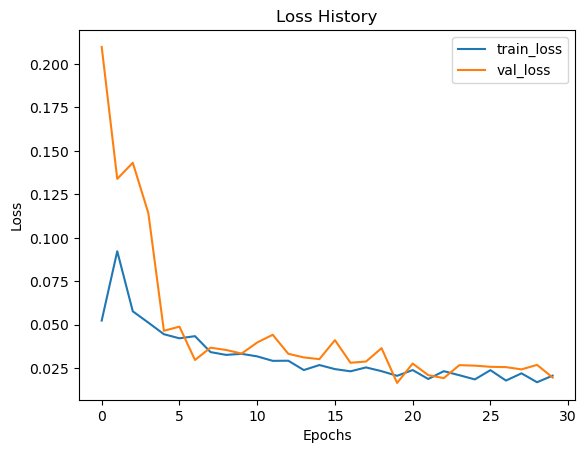

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

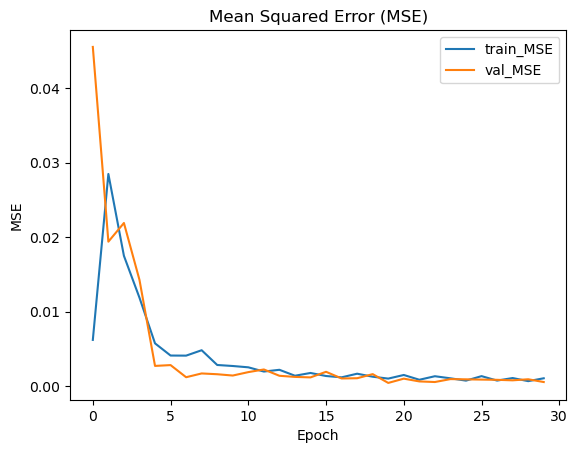

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

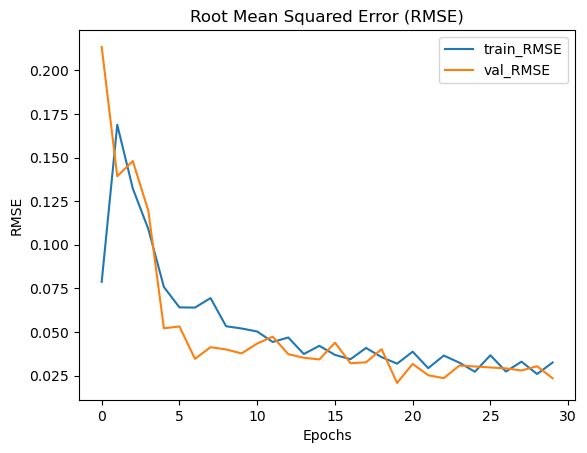

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

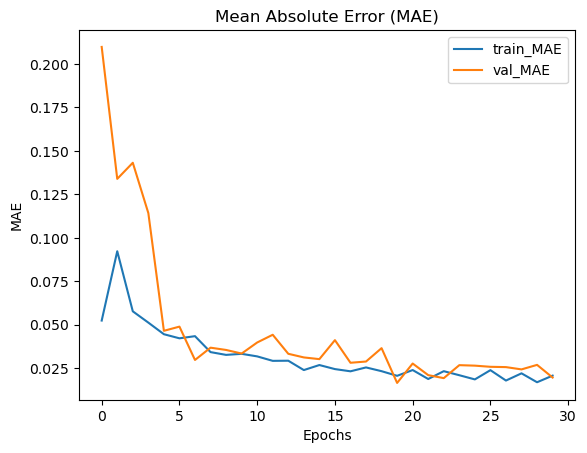

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

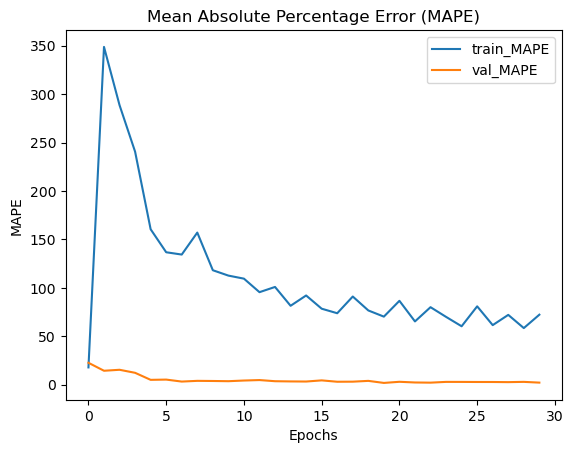

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:54:29.363826: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


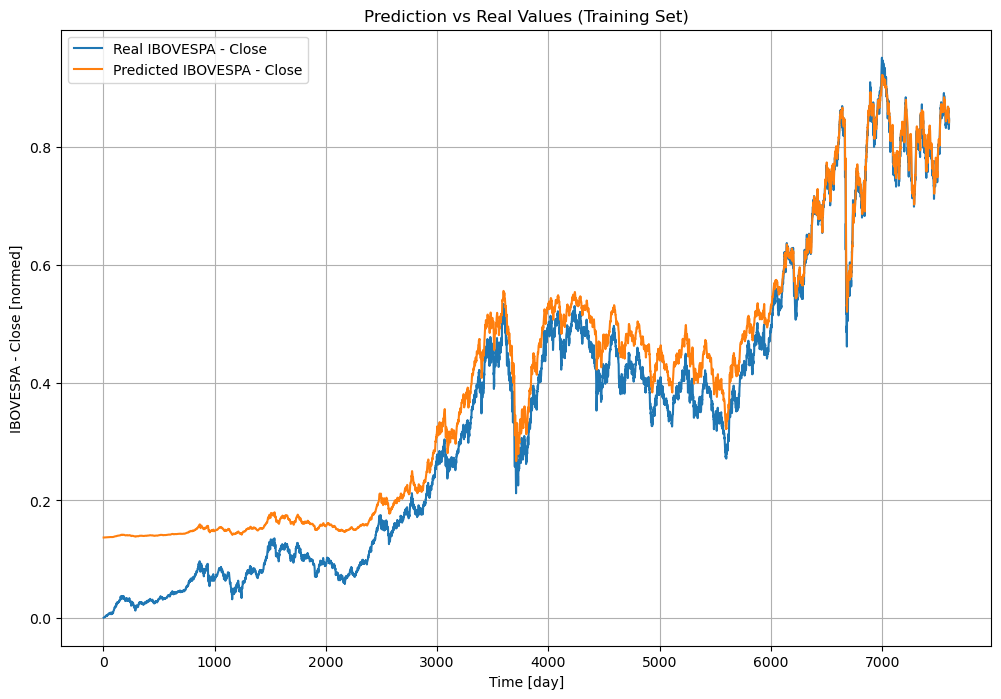

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


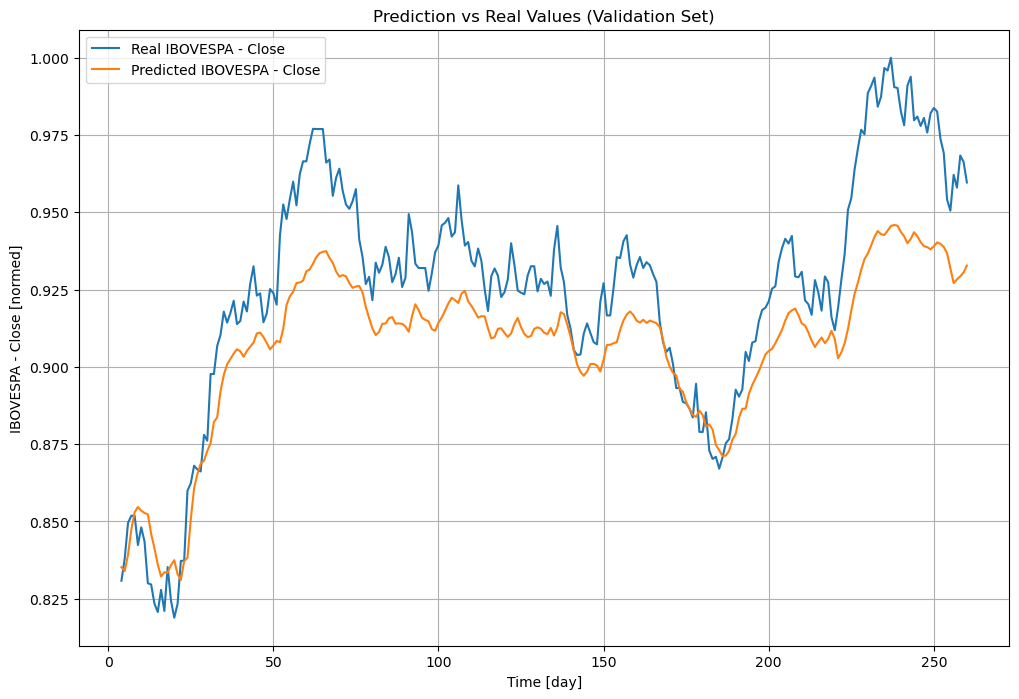

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


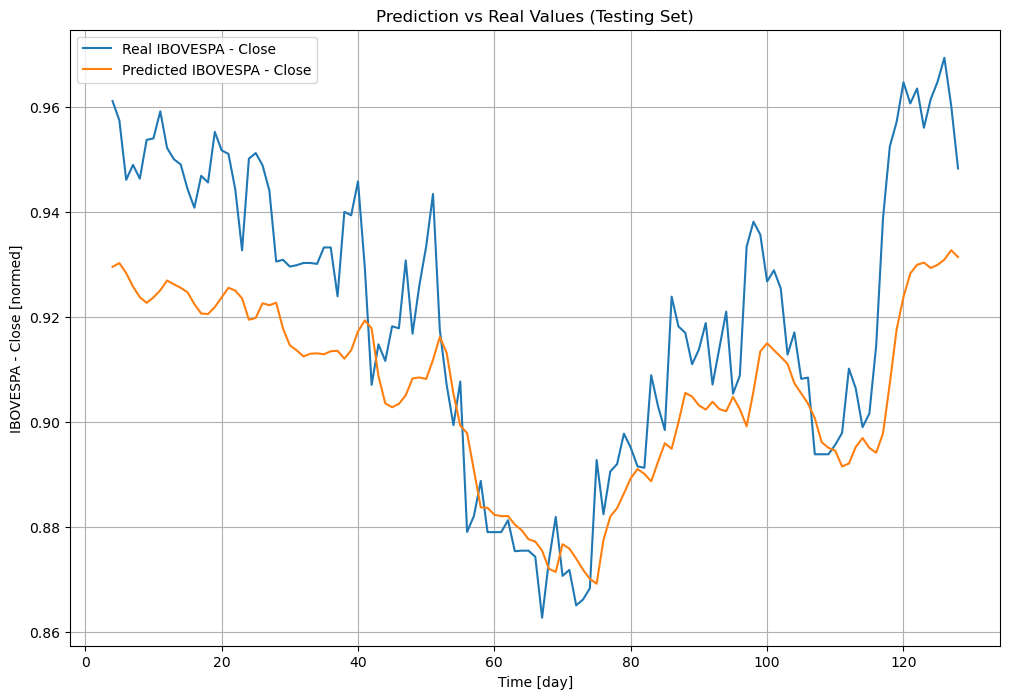

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

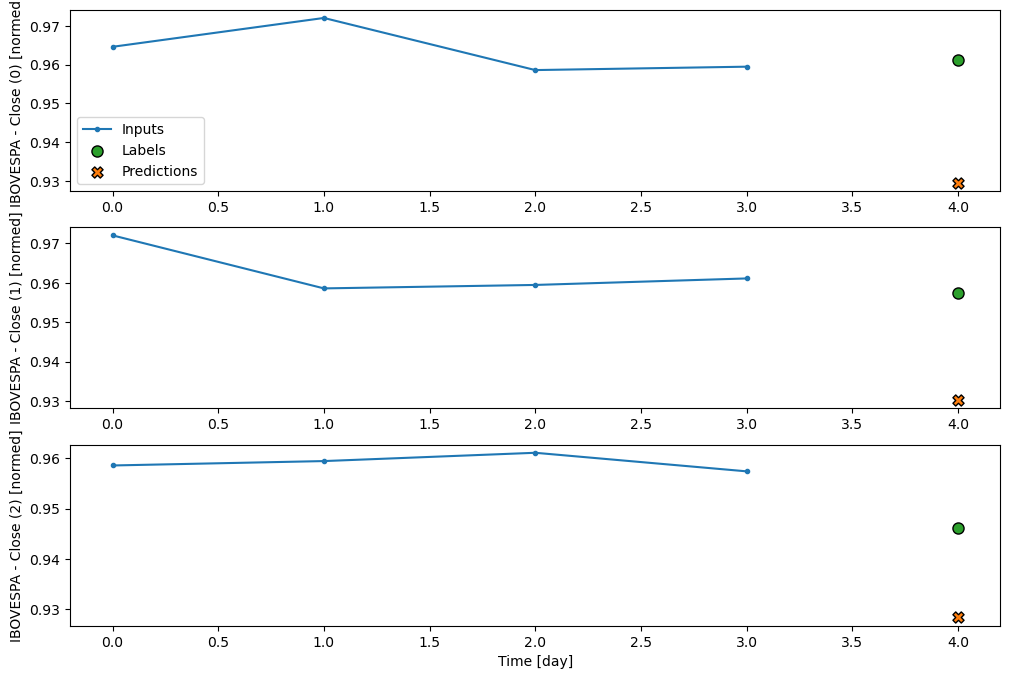

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:7s:565ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


array([[[0.9295193 , 0.9295193 , 0.9295193 , ..., 0.9295193 ,
         0.9295193 , 0.9295193 ]],

       [[0.9302461 , 0.9302461 , 0.9302461 , ..., 0.9302461 ,
         0.9302461 , 0.9302461 ]],

       [[0.928339  , 0.928339  , 0.928339  , ..., 0.928339  ,
         0.928339  , 0.928339  ]],

       ...,

       [[0.9308902 , 0.9308902 , 0.9308902 , ..., 0.9308902 ,
         0.9308902 , 0.9308902 ]],

       [[0.93268514, 0.93268514, 0.93268514, ..., 0.93268514,
         0.93268514, 0.93268514]],

       [[0.9313865 , 0.9313865 , 0.9313865 , ..., 0.9313865 ,
         0.9313865 , 0.9313865 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')